# Project Big Data 
## Hélène Lechêne, Marie Philippe, Claire Serraz & Romane Soler
## M2 D3S

This notebook presents the data that is used for the Big Data project, which is about the satisfaction of an airline company. A descriptive analysis is done on all the variables. It will help to clean the data and keep only relevant data.

# Part 0: Preliminary part

## 0.1. Libraries

In [ ]:
!pip install viscm
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


## 0.2. Import data and quick look

The data is composed of two files: a test and train file. Since one doesn't know how the split between the train and test sets was done, the 2 files will be first combined and then splitted again in spark. 

In [ ]:
# Import test data
test = pd.read_csv('test.csv', sep=",")
test.head(10)


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied
5,5,39177,Male,Loyal Customer,16,Business travel,Eco,311,3,3,...,5,4,3,1,1,2,5,0,0.0,satisfied
6,6,79433,Female,Loyal Customer,77,Business travel,Business,3987,5,5,...,5,5,5,5,4,5,3,0,0.0,satisfied
7,7,97286,Female,Loyal Customer,43,Business travel,Business,2556,2,2,...,4,4,4,4,5,4,3,77,65.0,satisfied
8,8,27508,Male,Loyal Customer,47,Business travel,Eco,556,5,2,...,5,2,2,5,3,3,5,1,0.0,satisfied
9,9,62482,Female,Loyal Customer,46,Business travel,Business,1744,2,2,...,4,4,4,4,5,4,4,28,14.0,satisfied


In [ ]:
print('There are', np.shape(test)[0], 'comments and',
      np.shape(test)[1], 'variables in the test dataset.')


There are 25976 comments and 25 variables in the test dataset.


In [ ]:
# Import train data
train = pd.read_csv('train.csv', sep=",")
train.head(10)


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
5,5,111157,Female,Loyal Customer,26,Personal Travel,Eco,1180,3,4,...,1,3,4,4,4,4,1,0,0.0,neutral or dissatisfied
6,6,82113,Male,Loyal Customer,47,Personal Travel,Eco,1276,2,4,...,2,3,3,4,3,5,2,9,23.0,neutral or dissatisfied
7,7,96462,Female,Loyal Customer,52,Business travel,Business,2035,4,3,...,5,5,5,5,4,5,4,4,0.0,satisfied
8,8,79485,Female,Loyal Customer,41,Business travel,Business,853,1,2,...,1,1,2,1,4,1,2,0,0.0,neutral or dissatisfied
9,9,65725,Male,disloyal Customer,20,Business travel,Eco,1061,3,3,...,2,2,3,4,4,3,2,0,0.0,neutral or dissatisfied


In [ ]:
print('There are', np.shape(train)[0], 'comments and',
      np.shape(train)[1], 'variables in the train dataset.')


There are 103904 comments and 25 variables in the train dataset.


In [ ]:
# Combine the two files
data_combined = pd.concat([test, train], axis=0)
data_combined


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [ ]:
print('There are', np.shape(data_combined)[0], 'comments and',
      np.shape(data_combined)[1], 'variables in the combined dataset.')


There are 129880 comments and 25 variables in the combined dataset.


In [ ]:
# Checking the concatenation was well done
np.shape(test)[0] + np.shape(train)[0]


129880

In [ ]:
# Copy of the dataframe
df = data_combined.copy()


In [ ]:
# Set the column 'id' to index and delete the column unnamed (index of the csv)
df = df.set_index('id')
df.index.name = None
df = df.drop(df.columns[0], axis=1)
df


,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,6.0,satisfied
36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


# Part 1: Exploration of the variables 

## 1.0. Dataset

**Missing values**

In [ ]:
# Number of missing values for each variable
df.isna().sum()


Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction                           0
dtype: int64

One may see that the only variable that has missing values is "Arrival Delay in Minutes". The number being quite small compared to the number of individuals, the rows with missing values are deleted. 

In [ ]:
# Drop the missing values
df = df.dropna(subset=['Arrival Delay in Minutes'])
df.shape


(129487, 23)

Some variables correspond to satisfaction variables, they are grade going from 1 to 5. However, sometimes they are equal to 0 but it isn't applicable thus these rows are deleted. 



In [ ]:
# Drop values equal to 0 that are not applicable
df = df[df['Inflight wifi service'] != 0]
df = df[df['Departure/Arrival time convenient'] != 0]
df = df[df['Ease of Online booking'] != 0]
df = df[df['Gate location'] != 0]
df = df[df['Food and drink'] != 0]
df = df[df['Online boarding'] != 0]
df = df[df['Seat comfort'] != 0]
df = df[df['Inflight entertainment'] != 0]
df = df[df['On-board service'] != 0]
df = df[df['Leg room service'] != 0]
df = df[df['Baggage handling'] != 0]
df = df[df['Checkin service'] != 0]
df = df[df['Inflight service'] != 0]
df = df[df['Cleanliness'] != 0]
df


,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,satisfied
39177,Male,Loyal Customer,16,Business travel,Eco,311,3,3,3,3,...,5,4,3,1,1,2,5,0,0.0,satisfied
79433,Female,Loyal Customer,77,Business travel,Business,3987,5,5,5,5,...,5,5,5,5,4,5,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [ ]:
print('There are now', np.shape(df)[0], 'comments and',
      np.shape(df)[1], 'variables in the dataset.')


There are now 119204 comments and 23 variables in the dataset.


**Summary statistics**

In [ ]:
df.describe()


,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,119204.000000,119204.000000,119204.000000,119204.000000,119204.000000,119204.000000,119204.000000,119204.000000,119204.000000,119204.000000,119204.000000,119204.000000,119204.000000,119204.000000,119204.000000,119204.000000,119204.000000,119204.000000
mean,39.858092,1223.791920,2.817749,3.206679,2.879031,2.987047,3.213785,3.330576,3.456562,3.380507,3.386354,3.380608,3.637109,3.294688,3.646547,3.294034,14.837631,15.284361
std,15.028936,999.840822,1.253348,1.386885,1.298665,1.282043,1.324443,1.263094,1.311612,1.327262,1.285393,1.295451,1.167923,1.266235,1.165733,1.310339,38.165770,38.687386
min,7.000000,31.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,28.000000,440.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,867.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1775.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,13.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


The summary statistics will be examined in the next subsection. 

## 1.1. Satisfaction: the target variable

The satisfaction is the target, it means that the customers will be grouped into the different classes of this variables. 

In [ ]:
# Modalities
print(df["satisfaction"].unique())


['satisfied' 'neutral or dissatisfied']


The customers can be either satisfied or neural/dissatisfied. 

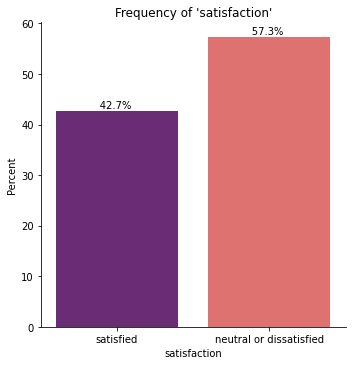

In [ ]:
# One draws the barplot of the variable "satisfaction"
freq_satisfaction = df["satisfaction"].astype(str).value_counts(
    normalize=True)*100
l = []

# Creation of a dictionnary with the modalities and the
# frequency linked to the modalities
for i in range(freq_satisfaction.shape[0]):
    l.append({"satisfaction": freq_satisfaction.index[i],
              "Percent": freq_satisfaction[i]})

# One transforms this dictionnary into a dataframe
df_satisfaction = pd.DataFrame(l)
df_satisfaction

# One plots the barplot (without the frequencies)
g = sns.catplot(x="satisfaction", y="Percent", kind="bar",
                data=df_satisfaction, palette="magma",
                order=["satisfied", "neutral or dissatisfied"])

# One adds the frequencies at the top of each bar
for p in g.ax.patches:
    txt = "              " + str(p.get_height().round(1)) + '%'
    txt_x = p.get_x()
    txt_y = p.get_height() + 0.5
    g.ax.set_title("Frequency of 'satisfaction'")
    g.ax.text(txt_x, txt_y, txt)


A little more customer are neutral or dissatisfied (57.3%) than satisfied (42.7%). It could be due to the fact that neutral could maybe be a modality by itself. 

## 1.2. Gender (qualitative variable)

This variable gives the gender of passengers: female or male. 

**Frequency**

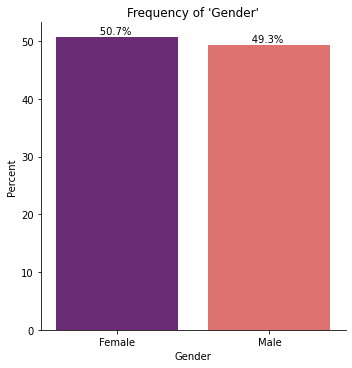

In [ ]:
# One draws the barplot of the variable "Gender"
freq_gender = df["Gender"].astype(str).value_counts(normalize=True)*100
l = []

# Creation of a dictionnary with the modalities and
# the frequency linked to the modalities
for i in range(freq_gender.shape[0]):
    l.append({"Gender": freq_gender.index[i], "Percent": freq_gender[i]})

# One transforms this dictionnary into a dataframe
df_gender = pd.DataFrame(l)
df_gender

# One plots the barplot (without the frequencies)
g = sns.catplot(x="Gender", y="Percent", kind='bar',
                data=df_gender, palette="magma")

# One adds the frequencies at the top of each bar
for p in g.ax.patches:
    txt = "              " + str(p.get_height().round(1)) + '%'
    txt_x = p.get_x()
    txt_y = p.get_height() + 0.5
    g.ax.set_title("Frequency of 'Gender'")
    g.ax.text(txt_x, txt_y, txt)


The number of women and men is almost the same even if there are a little more women. 

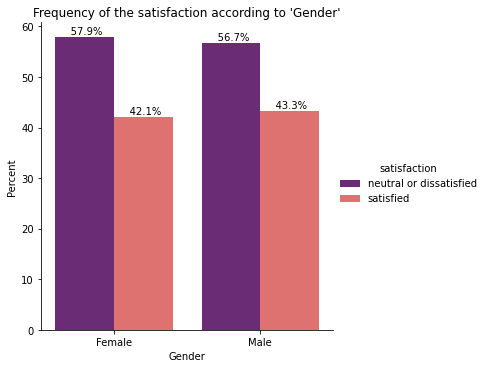

In [ ]:
# Dataframe of the frequencies
df_gender2 = (df.groupby(['Gender'])['satisfaction']
                .value_counts(normalize=True)
                .rename('Percent')
                .mul(100)
                .reset_index()
                .sort_values('satisfaction'))
df_gender2

# One plots the barplot (without the frequencies)
g = sns.catplot(x="Gender", y="Percent", kind="bar",
                hue="satisfaction",
                data=df_gender2, palette="magma")

# One adds the frequencies at the top of each bar
for p in g.ax.patches:
    txt = "     " + str(p.get_height().round(1)) + '%'
    txt_x = p.get_x()
    txt_y = p.get_height() + 0.5
    g.ax.set_title("Frequency of the satisfaction according to 'Gender'")
    g.ax.text(txt_x, txt_y, txt)


It loos like less people are satisfied than neutral or dissatisfied. Moreover, the distribution of female and male among satisfied people or not is very similar. This variable doesn't seem to be correlated so much to the satisfaction. 

## 1.3. Customer Type (qualitative variable)

The customer type has 2 modalities: loyal or disloyal customer. 

**Frequency**

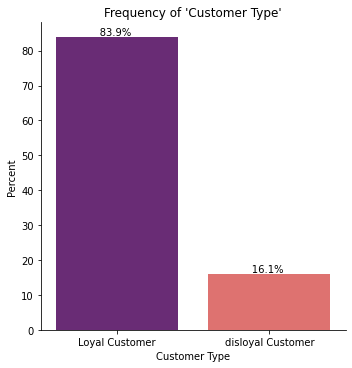

In [ ]:
# One draws the barplot of the variable "Customer Type"
freq_ctype = df["Customer Type"].astype(str).value_counts(normalize=True)*100
l = []

# Creation of a dictionnary with the modalities and the
# frequency linked to the modalities
for i in range(freq_ctype.shape[0]):
    l.append({"Customer Type": freq_ctype.index[i], "Percent": freq_ctype[i]})

# One transforms this dictionnary into a dataframe
df_ctype = pd.DataFrame(l)
df_ctype

# One plots the barplot (without the frequencies)
g = sns.catplot(x="Customer Type", y="Percent", kind="bar",
                data=df_ctype, palette="magma")

# One adds the frequencies at the top of each bar
for p in g.ax.patches:
    txt = "              " + str(p.get_height().round(1)) + '%'
    txt_x = p.get_x()
    txt_y = p.get_height() + 0.5
    g.ax.set_title("Frequency of 'Customer Type'")
    g.ax.text(txt_x, txt_y, txt)


This airline company has much more disloyer customer than loyer customers.

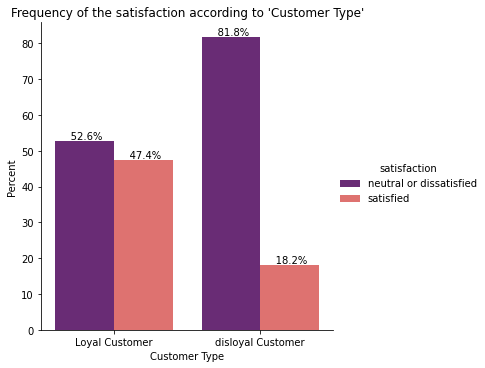

In [ ]:
# Dataframe of the frequencies
df_ctype2 = (
    df.groupby(["Customer Type"])["satisfaction"]
    .value_counts(normalize=True)
    .rename("Percent")
    .mul(100)
    .reset_index()
    .sort_values("satisfaction")
)
df_ctype2

# One plots the barplot (without the frequencies)
g = sns.catplot(
    x="Customer Type",
    y="Percent",
    kind="bar",
    hue="satisfaction",
    data=df_ctype2,
    palette="magma",
)

# One adds the frequencies at the top of each bar
for p in g.ax.patches:
    txt = "     " + str(p.get_height().round(1)) + "%"
    txt_x = p.get_x()
    txt_y = p.get_height() + 0.5
    g.ax.set_title("Frequency of the satisfaction "
                   "according to 'Customer Type'")
    g.ax.text(txt_x, txt_y, txt)


Among the loyal customers, around 47% of them are satisfied and 52% are neutral or dissatisfied. Moreover, 82% of the disloyal customers are neutral or dissatisfied, it could explain why they are disloyal. The loyalty could be correlated to the satisfaction, which makes sense since a loyal customer is logically a satisfied one. 

## 1.4. Age (quantitative variable)

This variable gives the age the customers. 

**Summary statistics** 

In [ ]:
# Summary statistics
df['Age'].describe()


count    119204.000000
mean         39.858092
std          15.028936
min           7.000000
25%          28.000000
50%          40.000000
75%          51.000000
max          85.000000
Name: Age, dtype: float64

In average, people are around 40 years olds. Actually, 50% of the customers are 40 years old or younger. The yougest customer is 7 and the oldest one is 85. 

In [ ]:
# Summary statistics on satisfied customers
df[df['satisfaction'] == 'satisfied']['Age'].describe()


count    50874.000000
mean        42.520659
std         12.315689
min          7.000000
25%         34.000000
50%         43.000000
75%         52.000000
max         85.000000
Name: Age, dtype: float64

In [ ]:
# Summary statistics on unsatisfied customers
df[df['satisfaction'] != 'satisfied']['Age'].describe()


count    68330.000000
mean        37.875721
std         16.489476
min          7.000000
25%         25.000000
50%         37.000000
75%         50.000000
max         85.000000
Name: Age, dtype: float64

Satisfied customers seem a little older than the unsatisfied ones. 

**Distribution**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


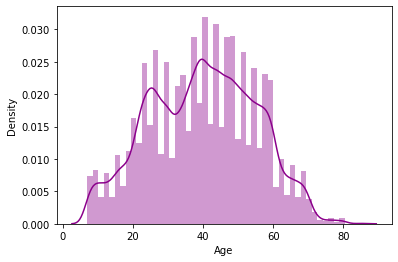

In [ ]:
# Density plot
sns.distplot(df.Age, kde=True, color="darkmagenta")
plt.show()


The density confirms that most of the customers are around 40 years old, not many are less than 20 and more than 60 years old. 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


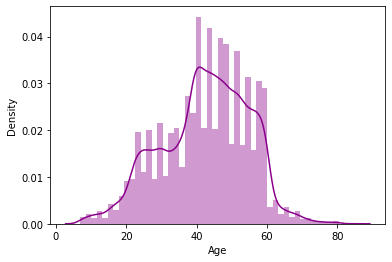

In [ ]:
# Density plot on satisfied customers
sns.distplot(df[df['satisfaction'] == 'satisfied']['Age'], kde=True,
             color="darkmagenta")
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


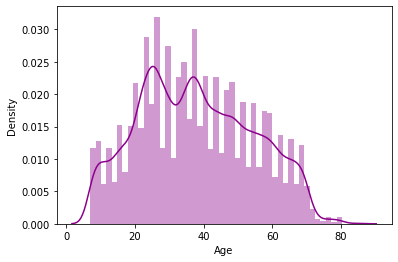

In [ ]:
# Density plot on unsatisfied customers
sns.distplot(df[df['satisfaction'] != 'satisfied']['Age'], kde=True,
             color="darkmagenta")
plt.show()


The two plots are different, they actually show that younger people (less than 40) tend to be less satisfied than older people (more than 40). Afterall, the age could have an impact on the satisfaction. 

## 1.5. Type of Travel (qualitative)

The type of travel is the purpose of travel, it can be either for business or personal. 

**Frequency**

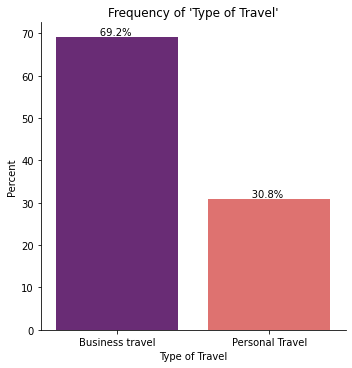

In [ ]:
# One draws the barplot of the variable "Type of Travel"
freq_typetravel = df["Type of Travel"].astype(str).value_counts(
    normalize=True)*100
l = []

# Creation of a dictionnary with the modalities and the
# frequency linked to the modalities
for i in range(freq_typetravel.shape[0]):
    l.append({"Type of Travel": freq_typetravel.index[i],
              "Percent": freq_typetravel[i]})

# One transforms this dictionnary into a dataframe
df_typetravel = pd.DataFrame(l)
df_typetravel

# One plots the barplot (without the frequencies)
g = sns.catplot(x="Type of Travel", y="Percent", kind="bar",
                data=df_typetravel, palette="magma")

# One adds the frequencies at the top of each bar
for p in g.ax.patches:
    txt = "              " + str(p.get_height().round(1)) + '%'
    txt_x = p.get_x()
    txt_y = p.get_height() + 0.5
    g.ax.set_title("Frequency of 'Type of Travel'")
    g.ax.text(txt_x, txt_y, txt)


70% of the travelers traveled for business whereas only 30% for personal reasons. 

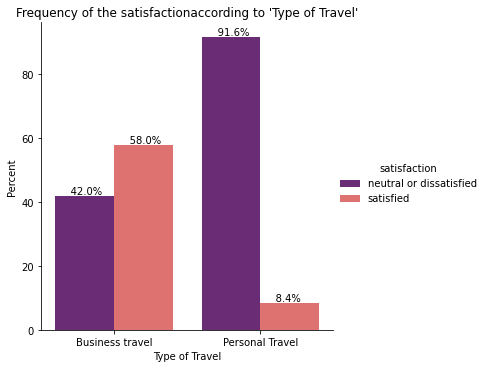

In [ ]:
# Dataframe of the frequencies
df_typetravel = (df.groupby(['Type of Travel'])['satisfaction']
                   .value_counts(normalize=True)
                   .rename('Percent')
                   .mul(100)
                   .reset_index()
                   .sort_values('satisfaction'))
df_typetravel

# One plots the barplot (without the frequencies)
g = sns.catplot(x="Type of Travel", y="Percent", kind="bar",
                hue="satisfaction",
                data=df_typetravel, palette="magma")

# One adds the frequencies at the top of each bar
for p in g.ax.patches:
    txt = "     " + str(p.get_height().round(1)) + '%'
    txt_x = p.get_x()
    txt_y = p.get_height() + 0.5
    g.ax.set_title("Frequency of the satisfaction"
                   "according to 'Type of Travel'")
    g.ax.text(txt_x, txt_y, txt)


It is not surprising that business travelers are more satisfied than personal travelers. Among the business travelers, 58% of them are satisfied against only around 8% of the personal travelers. 

## 1.6. Class (qualitative variable)

The class variable has 3 modalities: business, eco and eco plus. It corresponds to the class in the plane. 

**Frequency**

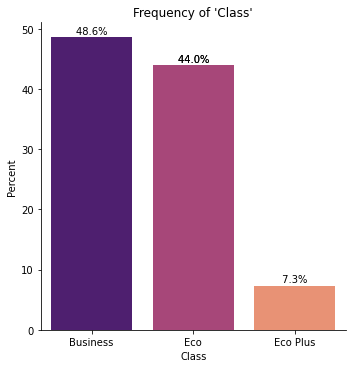

In [ ]:
# One draws the barplot of the variable "Class"
freq_class = df["Class"].astype(str).value_counts(normalize=True)*100
l = []

# Creation of a dictionnary with the modalities and the
# frequency linked to the modalities
for i in range(freq_class.shape[0]):
    l.append({"Class": freq_class.index[i], "Percent": freq_class[i]})

# One transforms this dictionnary into a dataframe
df_class = pd.DataFrame(l)
df_class

# One plots the barplot (without the frequencies)
g = sns.catplot(x="Class", y="Percent", kind="bar",
                data=df_class, palette="magma")

# One adds the frequencies at the top of each bar
for p in g.ax.patches:
    if len(str(p.get_height().round(1))) == 4:
        txt = "        " + str(p.get_height().round(1)) + '%'
        txt_x = p.get_x()
        txt_y = p.get_height() + 0.5
        g.ax.set_title("Frequency of 'Class'")
    g.ax.text(txt_x, txt_y, txt)
    if len(str(p.get_height().round(1))) == 3:
        txt = "         " + str(p.get_height().round(1)) + '%'
        txt_x = p.get_x()
        txt_y = p.get_height() + 0.5
        g.ax.set_title("Frequency of 'Class'")
        g.ax.text(txt_x, txt_y, txt)


Only 7% of the passengers are in the eco plus class. It could be explained by the fact that less seats could be offered in this class. For the two other classes the frequencies are similar: around 49% for business and 44% for eco. 

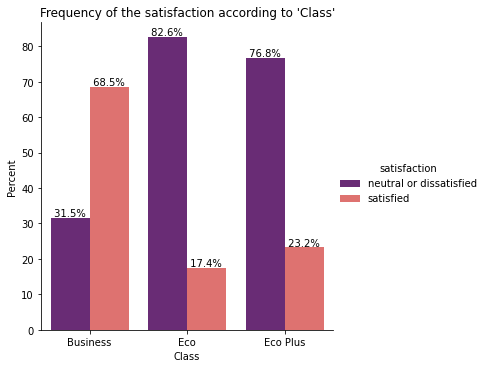

In [ ]:
# Dataframe of the frequencies
df_class2 = (df.groupby(['Class'])['satisfaction']
               .value_counts(normalize=True)
               .rename('Percent')
               .mul(100)
               .reset_index()
               .sort_values('satisfaction'))
df_class2

# One plots the barplot (without the frequencies)
g = sns.catplot(x="Class", y="Percent", kind="bar",
                hue="satisfaction",
                data=df_class2, palette="magma")

# One adds the frequencies at the top of each bar
for p in g.ax.patches:
    txt = " " + str(p.get_height().round(1)) + '%'
    txt_x = p.get_x()
    txt_y = p.get_height() + 0.5
    g.ax.set_title("Frequency of the satisfaction according to 'Class'")
    g.ax.text(txt_x, txt_y, txt)


People in business are the most satisfied ones since 68.5% of them are satisfied. For the eco and eco plus classes, more than 76% aren't statisfied which makes a big difference compared to the business class. This variable is likely to be correlated with the satisfaction. 

## 1.7. Flight Distance (quantitative variable)                       

This is the distance of the flight. 

**Summary statistics**

In [ ]:
# Summary statistics
df['Flight Distance'].describe()


count    119204.000000
mean       1223.791920
std         999.840822
min          31.000000
25%         440.000000
50%         867.000000
75%        1775.000000
max        4983.000000
Name: Flight Distance, dtype: float64

In average, passengers seem to fly a distance of around 1200km. The longest flight was around 5000km and the smallest one 31km. 

In [ ]:
# Summary statistics on satisfied customers
df[df['satisfaction'] == 'satisfied']['Flight Distance'].describe()


count    50874.000000
mean      1579.916696
std       1124.620244
min         31.000000
25%        566.000000
50%       1428.000000
75%       2454.000000
max       4983.000000
Name: Flight Distance, dtype: float64

In [ ]:
# Summary statistics on unsatisfied customers
df[df['satisfaction'] != 'satisfied']['Flight Distance'].describe()


count    68330.000000
mean       958.644958
std        798.497845
min         31.000000
25%        399.000000
50%        698.000000
75%       1190.000000
max       4983.000000
Name: Flight Distance, dtype: float64

Satisfied customers seem to travel longer distances than unsatisfied customers. Indeed, 50% of the satisfied people traveled a distance of around 1430 km or less. On the other hand, unsatisfied people traveled a distance of only 698 km or less. 

**Distribution**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


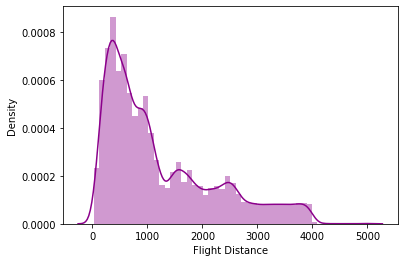

In [ ]:
# Density plot
sns.distplot(df['Flight Distance'], kde=True, color="darkmagenta")
plt.show()


Most of the flights are under 1000km. 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


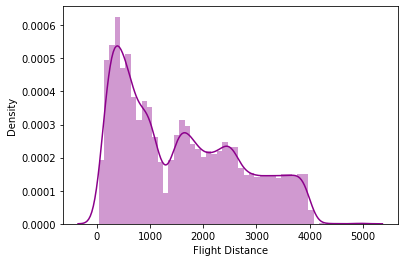

In [ ]:
# Density plot on satisfied customers
sns.distplot(df[df['satisfaction'] == 'satisfied']['Flight Distance'],
             kde=True, color="darkmagenta")
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


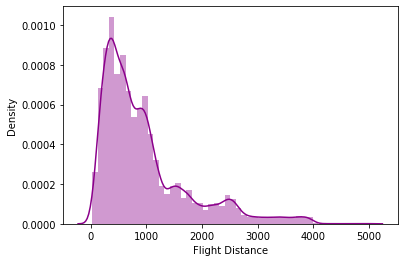

In [ ]:
# Density plot on unsatisfied customers
sns.distplot(df[df['satisfaction'] != 'satisfied']['Flight Distance'],
             kde=True, color="darkmagenta")
plt.show()


The plots confirm that satisfied customer travel longer distances. Thus, this variable might play a role in the satisfaction. 

## 1.8. Inflight wifi service (quantitative variable)

The inflight wifi service gives the level of satisfaction going from 1 (worst) to 5 (best). 

**Summary statistics**

In [ ]:
# Summary statistics
df['Inflight wifi service'].describe()


count    119204.000000
mean          2.817749
std           1.253348
min           1.000000
25%           2.000000
50%           3.000000
75%           4.000000
max           5.000000
Name: Inflight wifi service, dtype: float64

People don't seem that happy about the inflight wifi since the average grade is 2.8 over 5. 50% gave a 3 or less. 

In [ ]:
# Summary statistics on satisfied customers
df[df['satisfaction'] == 'satisfied']['Inflight wifi service'].describe()


count    50874.000000
mean         3.360498
std          1.389934
min          1.000000
25%          2.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: Inflight wifi service, dtype: float64

In [ ]:
# Summary statistics on unsatisfied customers
df[df['satisfaction'] != 'satisfied']['Inflight wifi service'].describe()


count    68330.000000
mean         2.413654
std          0.958895
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max          5.000000
Name: Inflight wifi service, dtype: float64

Satisfied people are more satisfied about the wifi since in average they gave a 3 against 2 for unsatisfied customers. Moreover, 50% of the satisfied people gave 4 or less whereas 50% of the unsatisfied people only gave 2 or less. 

**Distribution**

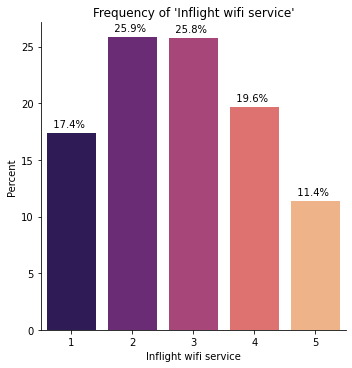

In [ ]:
# One draws the barplot of the variable "Inflight wifi service"
freq_wifi = df["Inflight wifi service"].astype(str).value_counts(
    normalize=True)*100
l = []

# Creation of a dictionnary with the modalities and the
# frequency linked to the modalities
for i in range(freq_wifi.shape[0]):
    l.append({"Inflight wifi service": freq_wifi.index[i],
              "Percent": freq_wifi[i]})

# One transforms this dictionnary into a dataframe
df_wifi = pd.DataFrame(l)
df_wifi

# One plots the barplot (without the frequencies)
g = sns.catplot(x="Inflight wifi service", y="Percent", kind="bar",
                data=df_wifi, palette="magma",
                order=['1', '2', '3', '4', '5'])

# One adds the frequencies at the top of each bar
for p in g.ax.patches:
    if len(str(p.get_height().round(1))) == 4:
        txt = "  " + str(p.get_height().round(1)) + '%'
        txt_x = p.get_x()
        txt_y = p.get_height() + 0.5
        g.ax.set_title("Frequency of 'Inflight wifi service'")
        g.ax.text(txt_x, txt_y, txt)
    if len(str(p.get_height().round(1))) == 3:
        txt = "   " + str(p.get_height().round(1)) + '%'
        txt_x = p.get_x()
        txt_y = p.get_height() + 0.5
        g.ax.set_title("Frequency of 'Inflight wifi service'")
        g.ax.text(txt_x, txt_y, txt)


There aren't many "extreme" (5) values. 50% of the customers answered 2 or 3. Customers seem rather unsatisfied. 

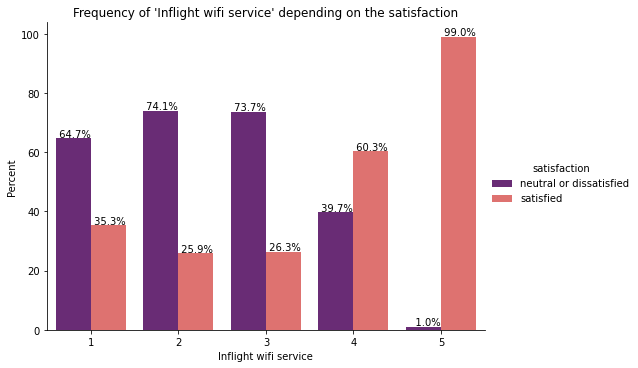

In [ ]:
# Dataframe of the frequencies
df_wifi2 = (df.groupby(['Inflight wifi service'])['satisfaction']
              .value_counts(normalize=True)
              .rename('Percent')
              .mul(100)
              .reset_index()
              .sort_values('satisfaction'))
df_wifi2

# One plots the barplot (without the frequencies)
g = sns.catplot(x="Inflight wifi service", y="Percent", kind="bar",
                hue="satisfaction",
                data=df_wifi2, palette="magma",
                aspect=11.7/8.27)

# One adds the frequencies at the top of each bar
for p in g.ax.patches:
    if len(str(p.get_height().round(1))) == 4:
        txt = " " + str(p.get_height().round(1)) + '%'
        txt_x = p.get_x()
        txt_y = p.get_height() + 0.5
        g.ax.set_title("Frequency of 'Inflight wifi service' "
                       "depending on the satisfaction")
        g.ax.text(txt_x, txt_y, txt)
    if len(str(p.get_height().round(1))) == 3:
        txt = "   " + str(p.get_height().round(1)) + '%'
        txt_x = p.get_x()
        txt_y = p.get_height() + 0.5
        g.ax.set_title("Frequency of the satisfaction according "
                       "to 'Inflight wifi service'")
        g.ax.text(txt_x, txt_y, txt)


The satisfied customers gave the better grades. The inflight wifi service seems to have an impact on the satisfaction. The 1% unsatisfied customer giving a 5 can be surprising. 

## 1.9. Departure/Arrival time convenient (quantitative variable)



This variable is the satisfaction (1 to 5, 5 being the best) of the departure and arrival time conveniency. 

**Summary statistics**

In [ ]:
# Summary statistics
df['Departure/Arrival time convenient'].describe()


count    119204.000000
mean          3.206679
std           1.386885
min           1.000000
25%           2.000000
50%           3.000000
75%           4.000000
max           5.000000
Name: Departure/Arrival time convenient, dtype: float64

In average, people gave a 3 about their satisfaction concerning the departure/arrival time. 

In [ ]:
# Summary statistics on satisfied customers
df[df['satisfaction'] == 'satisfied'][
  'Departure/Arrival time convenient'].describe()


count    50874.000000
mean         3.112671
std          1.414256
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: Departure/Arrival time convenient, dtype: float64

In [ ]:
# Summary statistics on unsatisfied customers
df[df['satisfaction'] != 'satisfied'][
  'Departure/Arrival time convenient'].describe()


count    68330.000000
mean         3.276672
std          1.361953
min          1.000000
25%          2.000000
50%          4.000000
75%          4.000000
max          5.000000
Name: Departure/Arrival time convenient, dtype: float64

The result are very similar with a very close mean and median. This variable might not be that important. 

**Distribution**

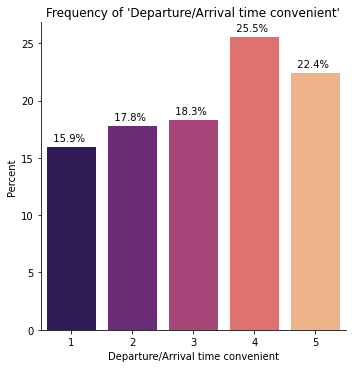

In [ ]:
# One draws the barplot of the variable "Departure/ Arrival time convenient"
freq_dep_ar = df[
  "Departure/Arrival time convenient"].astype(str).value_counts(
  normalize=True)*100
l = []

# Creation of a dictionnary with the modalities and the
# frequency linked to the modalities
for i in range(freq_dep_ar.shape[0]):
    l.append({"Departure/Arrival time convenient": freq_dep_ar.index[i],
              "Percent": freq_dep_ar[i]})

# One transforms this dictionnary into a dataframe
df_dep_ar = pd.DataFrame(l)
df_dep_ar

# One plots the barplot (without the frequencies)
g = sns.catplot(x="Departure/Arrival time convenient", y="Percent", kind="bar",
                data=df_dep_ar, palette="magma",
                order=['1', '2', '3', '4', '5'])

# One adds the frequencies at the top of each bar
for p in g.ax.patches:
    if len(str(p.get_height().round(1))) == 4:
        txt = "  " + str(p.get_height().round(1)) + '%'
        txt_x = p.get_x()
        txt_y = p.get_height() + 0.5
        g.ax.set_title("Frequency of 'Departure/Arrival time convenient'")
        g.ax.text(txt_x, txt_y, txt)
    if len(str(p.get_height().round(1))) == 3:
        txt = "   " + str(p.get_height().round(1)) + '%'
        txt_x = p.get_x()
        txt_y = p.get_height() + 0.5
        g.ax.set_title("Frequency of 'Departure/Arrival time convenient")
        g.ax.text(txt_x, txt_y, txt)


The frequencies are similar even though a little higher for 4. 

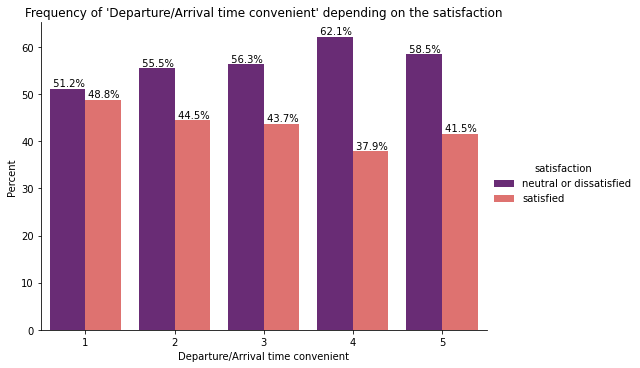

In [ ]:
# Dataframe of the frequencies
df_dep_ar2 = (df.groupby(['Departure/Arrival time convenient'])['satisfaction']
                .value_counts(normalize=True)
                .rename('Percent')
                .mul(100)
                .reset_index()
                .sort_values('satisfaction'))

# One plots the barplot (without the frequencies)
g = sns.catplot(x="Departure/Arrival time convenient", y="Percent", kind="bar",
                hue="satisfaction",
                data=df_dep_ar2, palette="magma",
                aspect=11.7/8.27)

# One adds the frequencies at the top of each bar
for p in g.ax.patches:
    if len(str(p.get_height().round(1))) == 4:
        txt = " " + str(p.get_height().round(1)) + '%'
        txt_x = p.get_x()
        txt_y = p.get_height() + 0.5
        g.ax.set_title("Frequency of 'Departure/Arrival time convenient' "
                       "depending on the satisfaction")
        g.ax.text(txt_x, txt_y, txt)
    if len(str(p.get_height().round(1))) == 3:
        txt = "   " + str(p.get_height().round(1)) + '%'
        txt_x = p.get_x()
        txt_y = p.get_height() + 0.5
        g.ax.set_title("Frequency of the satisfaction according to "
                       "'Departure/Arrival time convenient'")
        g.ax.text(txt_x, txt_y, txt)


The percentages of the grades for each grade is quite similar. However, the unsatisfied customers have higher percentages than the satisfied ones which is why this variable might be linked to the satisfaction.

## 1.10. Ease of Online booking (quantitative variable)







The Ease of Online Booking has five grades of satifaction regarding this specific topic. It goes from 1 (worst) to 5 (best). 

**Summary statistics**

In [ ]:
# Summary statistics
df['Ease of Online booking'].describe()


count    119204.000000
mean          2.879031
std           1.298665
min           1.000000
25%           2.000000
50%           3.000000
75%           4.000000
max           5.000000
Name: Ease of Online booking, dtype: float64

In [ ]:
# Summary statistics on unstatisfied customers
df[df['satisfaction'] != 'satisfied']['Ease of Online booking'].describe()


count    68330.000000
mean         2.623650
std          1.155932
min          1.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          5.000000
Name: Ease of Online booking, dtype: float64

One clearly can see that the mean increases for the satisfied clients, while it decreases for the unsatisfied clients, compared to the overall mean. It makes sense.

**Distribution**

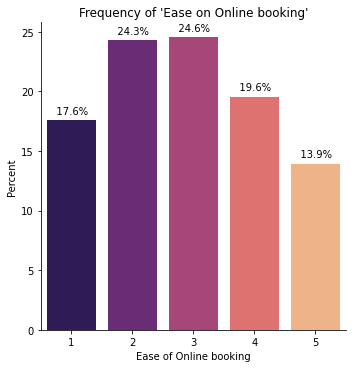

In [ ]:
# One draws the barplot of the variable "Ease of Online booking"
freq_eoob = df["Ease of Online booking"].astype(str).value_counts(
    normalize=True)*100
l = []

# Creation of a dictionnary with the modalities and
# the frequency linked to the modalities
for i in range(freq_eoob.shape[0]):
    l.append({"Ease of Online booking": freq_eoob.index[i],
              "Percent": freq_eoob[i]})

# One transforms this dictionnary into a dataframe
df_eoob = pd.DataFrame(l)
df_eoob

# One plots the barplot (without the frequencies)
g = sns.catplot(x="Ease of Online booking", y="Percent", kind="bar",
                data=df_eoob, palette="magma",
                order=['1', '2', '3', '4', '5'])

# One adds the frequencies at the top of each bar
for p in g.ax.patches:
    txt = "   " + str(p.get_height().round(1)) + '%'
    txt_x = p.get_x()
    txt_y = p.get_height() + 0.5
    g.ax.set_title("Frequency of 'Ease on Online booking'")
    g.ax.text(txt_x, txt_y, txt)


One can see above that the modality with the most observations is 3, whereas the modality with the lowest observation is 5. One can imagine that the online booking doesn't appear that easy for clients. Furthermore, 50% of the customers answered to this question with a 2 or 3 out of 5. It means that online booking doesn't seem that easy. 

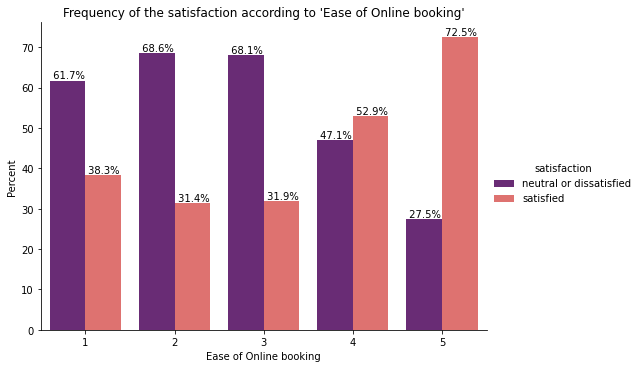

In [ ]:
# Dataframe of the frequencies
df_eoob2 = (df.groupby(['Ease of Online booking'])['satisfaction']
              .value_counts(normalize=True)
              .rename('Percent')
              .mul(100)
              .reset_index()
              .sort_values('satisfaction'))

# One plots the barplot (without the frequencies)
g = sns.catplot(x="Ease of Online booking", y="Percent", kind="bar",
                hue="satisfaction",
                data=df_eoob2, palette="magma",
                aspect=11.7/8.27)

# One adds the frequencies at the top of each bar
for p in g.ax.patches:
    if len(str(p.get_height().round(1))) == 4:
        txt = " " + str(p.get_height().round(1)) + '%'
        txt_x = p.get_x()
        txt_y = p.get_height() + 0.5
        g.ax.set_title("Frequency of the satisfaction according "
                       "to 'Ease of Online booking'")
        g.ax.text(txt_x, txt_y, txt)
    if len(str(p.get_height().round(1))) == 3:
        txt = "   " + str(p.get_height().round(1)) + '%'
        txt_x = p.get_x()
        txt_y = p.get_height() + 0.5
        g.ax.set_title("Frequency of the satisfaction"
                       "according to 'Ease of Online booking'")
        g.ax.text(txt_x, txt_y, txt)


One can easily see that if the ease of online booking is graded between 1 and 3, the clients are more likely to be unsatisfied or neutral, with a probability higher than 61%. 
The client is only more likely to be satisfied if he has graded the ease of online booking with the maximum grade. The satisfaction might be dependent of this variable. 

## 1.11. Gate location (quantitative variable)

The gate location has five possible grades of satifaction regarding this specific topic.

**Summary statistics**

In [ ]:
# Summary statistics
df['Gate location'].describe()


count    119204.000000
mean          2.987047
std           1.282043
min           1.000000
25%           2.000000
50%           3.000000
75%           4.000000
max           5.000000
Name: Gate location, dtype: float64

In [ ]:
# Summary statistics on satisfied customers
df[df['satisfaction'] == 'satisfied']['Gate location'].describe()


count    50874.000000
mean         2.988933
std          1.384566
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: Gate location, dtype: float64

In [ ]:
# Summary statistics on unstatisfied customers
df[df['satisfaction'] != 'satisfied']['Gate location'].describe()


count    68330.000000
mean         2.985643
std          1.200044
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: Gate location, dtype: float64

The results are very similar between the two groups. 

**Distribution**

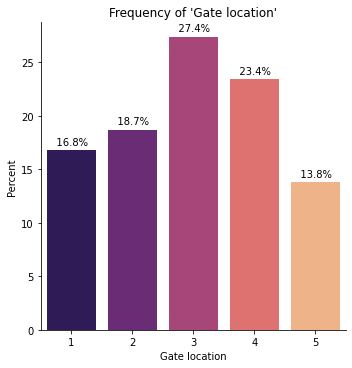

In [ ]:
# One draws the barplot of the variable "Gate location"
freq_gl = df["Gate location"].astype(str).value_counts(normalize=True)*100
l = []

# Creation of a dictionnary with the modalities and the
# frequency linked to the modalities
for i in range(freq_gl.shape[0]):
    l.append({"Gate location": freq_gl.index[i], "Percent": freq_gl[i]})

# One transforms this dictionnary into a dataframe
df_gl = pd.DataFrame(l)
df_gl

# One plots the barplot (without the frequencies)
g = sns.catplot(x="Gate location", y="Percent", kind="bar",
                data=df_gl, palette="magma",
                order=['1', '2', '3', '4', '5'])

# One adds the frequencies at the top of each bar
for p in g.ax.patches:
    if len(str(p.get_height().round(1))) == 4:
        txt = "   " + str(p.get_height().round(1)) + '%'
        txt_x = p.get_x()
        txt_y = p.get_height() + 0.5
        g.ax.set_title("Frequency of 'Gate location'")
        g.ax.text(txt_x, txt_y, txt)
    if len(str(p.get_height().round(1))) == 3:
        txt = "   " + str(p.get_height().round(1)) + '%'
        txt_x = p.get_x()
        txt_y = p.get_height() + 0.5
        g.ax.set_title("Frequency of 'Gate location")
        g.ax.text(txt_x, txt_y, txt)


One can see that the modalities with the highest number of observations is the modality 3, nearly followed by the modality 4. Clients seems to be neutral about the gate location.

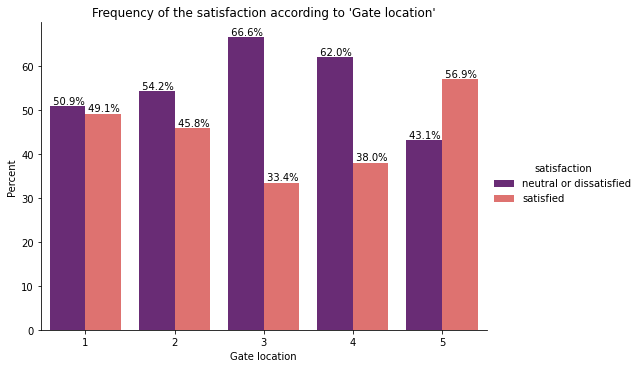

In [ ]:
# Dataframe of the frequencies
df_lg2 = (df.groupby(['Gate location'])['satisfaction']
            .value_counts(normalize=True)
            .rename('Percent')
            .mul(100)
            .reset_index()
            .sort_values('satisfaction'))

# One plots the barplot (without the frequencies)
g = sns.catplot(x="Gate location", y="Percent", kind="bar",
                hue="satisfaction",
                data=df_lg2, palette="magma",
                aspect=11.7/8.27)

# One adds the frequencies at the top of each bar
for p in g.ax.patches:
    if len(str(p.get_height().round(1))) == 4:
        txt = " " + str(p.get_height().round(1)) + '%'
        txt_x = p.get_x()
        txt_y = p.get_height() + 0.5
        g.ax.set_title("Frequency of the satisfaction according "
                       "to 'Gate location'")
        g.ax.text(txt_x, txt_y, txt)
    if len(str(p.get_height().round(1))) == 3:
        txt = "   " + str(p.get_height().round(1)) + '%'
        txt_x = p.get_x()
        txt_y = p.get_height() + 0.5
        g.ax.set_title("Frequency of the satisfaction according "
                       "to 'Gate location'")
        g.ax.text(txt_x, txt_y, txt)


The neutral or dissatisfied customers seem to be rather neutral about this question. One the contrary, statisfied people are either very satisfied or not at all. The differences of satisfaction according to the gate location satisfaction imply both are probably linked. 

## 1.12. Food and drink (quantitative variable)

This is a satisfaction variable going from 1 to 5 (best) about the food and drink. 

**Summary statistics**

In [ ]:
# Summary statistics
df['Food and drink'].describe()


count    119204.000000
mean          3.213785
std           1.324443
min           1.000000
25%           2.000000
50%           3.000000
75%           4.000000
max           5.000000
Name: Food and drink, dtype: float64

In [ ]:
# Summary statistics on statisfied customers
df[df['satisfaction'] == 'satisfied']['Food and drink'].describe()


count    50874.000000
mean         3.563274
std          1.213242
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: Food and drink, dtype: float64

In [ ]:
# Summary statistics on unstatisfied customers
df[df['satisfaction'] != 'satisfied']['Food and drink'].describe()


count    68330.000000
mean         2.953578
std          1.343737
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: Food and drink, dtype: float64

Compared to the overall mean, the mean of the satisfied customers is a little higher on the contrary of the unstatisfied customers for which the mean is slightly lower. 50% of the satisfied customers gave a 4 or less against 3 or less for the unstatisfied customers. 

**Distribution**

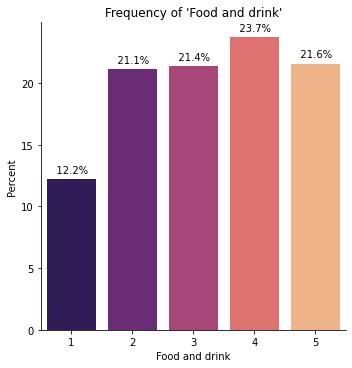

In [ ]:
# One draws the barplot of the variable "Food and drink"
freq_fd = df["Food and drink"].astype(str).value_counts(normalize=True)*100
l = []

# Creation of a dictionnary with the modalities and the
# frequency linked to the modalities
for i in range(freq_fd.shape[0]):
    l.append({"Food and drink": freq_fd.index[i], "Percent": freq_fd[i]})

# One transforms this dictionnary into a dataframe
df_fd = pd.DataFrame(l)
df_fd

# One plots the barplot (without the frequencies)
g = sns.catplot(x="Food and drink", y="Percent", kind="bar",
                data=df_fd, palette="magma",
                order=['1', '2', '3', '4', '5'])

# One adds the frequencies at the top of each bar
for p in g.ax.patches:
    if len(str(p.get_height().round(1))) == 4:
        txt = "   " + str(p.get_height().round(1)) + '%'
        txt_x = p.get_x()
        txt_y = p.get_height() + 0.5
        g.ax.set_title("Frequency of 'Food and drink'")
        g.ax.text(txt_x, txt_y, txt)
    if len(str(p.get_height().round(1))) == 3:
        txt = "   " + str(p.get_height().round(1)) + '%'
        txt_x = p.get_x()
        txt_y = p.get_height() + 0.5
        g.ax.set_title("Frequency of 'Food and drink")
        g.ax.text(txt_x, txt_y, txt)


80% of the customers gave a grade of 2 or more. They seem to be rather happy about the food and drink or at least neutral. The grades 2 to 5 have almost the same percentage of answer (around 20%). 

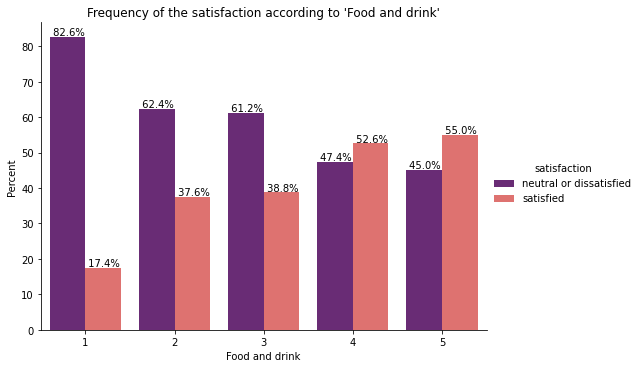

In [ ]:
# Dataframe of the frequencies
df_fd2 = (df.groupby(['Food and drink'])['satisfaction']
            .value_counts(normalize=True)
            .rename('Percent')
            .mul(100)
            .reset_index()
            .sort_values('satisfaction'))

# One plots the barplot (without the frequencies)
g = sns.catplot(x="Food and drink", y="Percent", kind="bar",
                hue="satisfaction",
                data=df_fd2, palette="magma",
                aspect=11.7/8.27)

# One adds the frequencies at the top of each bar
for p in g.ax.patches:
    if len(str(p.get_height().round(1))) == 4:
        txt = " " + str(p.get_height().round(1)) + '%'
        txt_x = p.get_x()
        txt_y = p.get_height() + 0.5
        g.ax.set_title("Frequency of the satisfaction according "
                       "to 'Food and drink'")
        g.ax.text(txt_x, txt_y, txt)
    if len(str(p.get_height().round(1))) == 3:
        txt = "   " + str(p.get_height().round(1)) + '%'
        txt_x = p.get_x()
        txt_y = p.get_height() + 0.5
        g.ax.set_title("Frequency of the satisfaction according "
                       "to 'Food and drink'")
        g.ax.text(txt_x, txt_y, txt)


The better the grade the most satisfied people answered and the worst the grade the less unsatisfied people answered. 

## 1.13. Online boarding (quantitative variable)

The online boarding corresponds to the statisfaction about it, going from 1 (worst) to 5 (best). 

**Summary statistics**

In [ ]:
# Summary statistics
df['Online boarding'].describe()


count    119204.000000
mean          3.330576
std           1.263094
min           1.000000
25%           2.000000
50%           4.000000
75%           4.000000
max           5.000000
Name: Online boarding, dtype: float64

In [ ]:
# Summary statistics on statisfied customers
df[df['satisfaction'] == 'satisfied']['Online boarding'].describe()


count    50874.000000
mean         4.164721
std          0.955825
min          1.000000
25%          4.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: Online boarding, dtype: float64

In [ ]:
# Summary statistics on unstatisfied customers
df[df['satisfaction'] != 'satisfied']['Online boarding'].describe()


count    68330.000000
mean         2.709527
std          1.095124
min          1.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          5.000000
Name: Online boarding, dtype: float64

The overall mean is 3. It is a little higher, 4, for satisfied customers and smaller, 2 (almost 3) for unstatisfied customers. This difference is also reflected by the median since 50% of the satisfied customers gave a 4 or less agains 3 for the unstatisfied customers and overall. 

**Distribution**

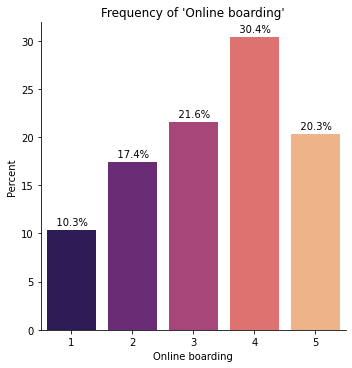

In [ ]:
# One draws the barplot of the variable "Online boarding"
freq_ob = df["Online boarding"].astype(str).value_counts(normalize=True)*100
l = []

# Creation of a dictionnary with the modalities and the
# frequency linked to the modalities
for i in range(freq_ob.shape[0]):
    l.append({"Online boarding": freq_ob.index[i], "Percent": freq_ob[i]})

# One transforms this dictionnary into a dataframe
df_ob = pd.DataFrame(l)
df_ob

# One plots the barplot (without the frequencies)
g = sns.catplot(x="Online boarding", y="Percent", kind="bar",
                data=df_ob, palette="magma",
                order=['1', '2', '3', '4', '5'])

# One adds the frequencies at the top of each bar
for p in g.ax.patches:
    if len(str(p.get_height().round(1))) == 4:
        txt = "   " + str(p.get_height().round(1)) + '%'
        txt_x = p.get_x()
        txt_y = p.get_height() + 0.5
        g.ax.set_title("Frequency of 'Online boarding'")
        g.ax.text(txt_x, txt_y, txt)
    if len(str(p.get_height().round(1))) == 3:
        txt = "   " + str(p.get_height().round(1)) + '%'
        txt_x = p.get_x()
        txt_y = p.get_height() + 0.5
        g.ax.set_title("Frequency of 'Online boarding'")
        g.ax.text(txt_x, txt_y, txt)


Customers seem rather satisfied about the online boarding since almost 50% of them gave a 4 or 5. The grade with the most answers is the grade 4. 

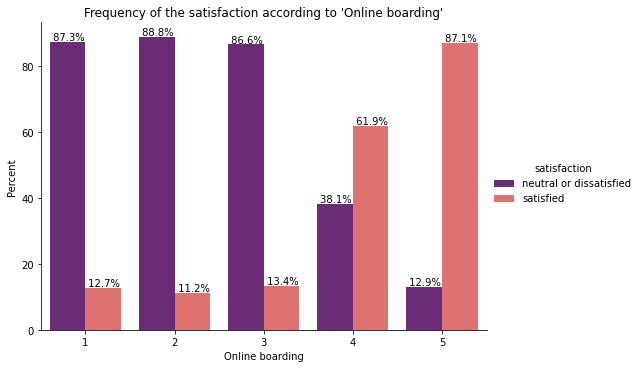

In [ ]:
# Dataframe of the frequencies
df_ob2 = (df.groupby(['Online boarding'])['satisfaction']
            .value_counts(normalize=True)
            .rename('Percent')
            .mul(100)
            .reset_index()
            .sort_values('satisfaction'))

# One plots the barplot (without the frequencies)
g = sns.catplot(x="Online boarding", y="Percent", kind="bar",
                hue="satisfaction",
                data=df_ob2, palette="magma",
                aspect=11.7/8.27)

# One adds the frequencies at the top of each bar
for p in g.ax.patches:
    if len(str(p.get_height().round(1))) == 4:
        txt = " " + str(p.get_height().round(1)) + '%'
        txt_x = p.get_x()
        txt_y = p.get_height() + 0.5
        g.ax.set_title("Frequency of the satisfaction according "
                       "to 'Online boarding'")
        g.ax.text(txt_x, txt_y, txt)
    if len(str(p.get_height().round(1))) == 3:
        txt = "   " + str(p.get_height().round(1)) + '%'
        txt_x = p.get_x()
        txt_y = p.get_height() + 0.5
        g.ax.set_title("Frequency of the satisfaction according "
                       "to 'Online boarding'")
        g.ax.text(txt_x, txt_y, txt)


Clearly the satisfied customers gave a 4 or 5 whereas the unstatisfied ones 1, 2 or 3. The difference between the answers is quite big between the statisfied and neutral or dissatidfied customers. This variable might therefore have an impact of the satisfaction. 

## 1.14. Seat comfort (quantitative variable)

This variable is a grade from 1 (worst) to 5 (best) about the seat comfort. 

**Summary statistics**

In [ ]:
# Summary statistics
df["Seat comfort"].describe()


count    119204.000000
mean          3.456562
std           1.311612
min           1.000000
25%           2.000000
50%           4.000000
75%           5.000000
max           5.000000
Name: Seat comfort, dtype: float64

In [ ]:
# Summary statistics on statisfied customers
df[df['satisfaction'] == 'satisfied']['Seat comfort'].describe()


count    50874.000000
mean         4.025612
std          1.096683
min          1.000000
25%          4.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: Seat comfort, dtype: float64

In [ ]:
# Summary statistics on unstatisfied customers
df[df['satisfaction'] != 'satisfied']['Seat comfort'].describe()


count    68330.000000
mean         3.032885
std          1.298125
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: Seat comfort, dtype: float64

Satisfied people in general are more satisfied about the seat comfort. In average, satisfied people gave a 4 whereas neutral or dissatisfied peole gave a 3. 

**Distribution**

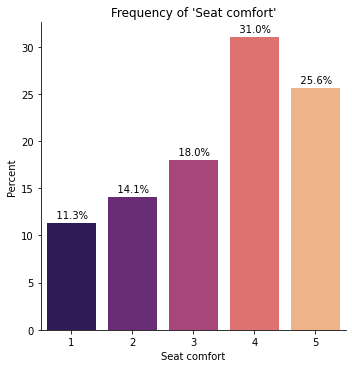

In [ ]:
# One draws the barplot of the variable "Seat comfort"
freq_sc = df["Seat comfort"].astype(str).value_counts(normalize=True)*100
l = []

# Creation of a dictionnary with the modalities and the
# frequency linked to the modalities
for i in range(freq_sc.shape[0]):
    l.append({"Seat comfort": freq_sc.index[i], "Percent": freq_sc[i]})

# One transforms this dictionnary into a dataframe
df_sc = pd.DataFrame(l)
df_sc

# One plots the barplot (without the frequencies)
g = sns.catplot(x="Seat comfort", y="Percent", kind="bar",
                data=df_sc, palette="magma",
                order=['1', '2', '3', '4', '5'])

# One adds the frequencies at the top of each bar
for p in g.ax.patches:
    txt = "   " + str(p.get_height().round(1)) + '%'
    txt_x = p.get_x()
    txt_y = p.get_height() + 0.5
    g.ax.set_title("Frequency of 'Seat comfort'")
    g.ax.text(txt_x, txt_y, txt)


The seats in this arline company seem very comfortable, as more than 55% of customers gave a 4 or 5. 

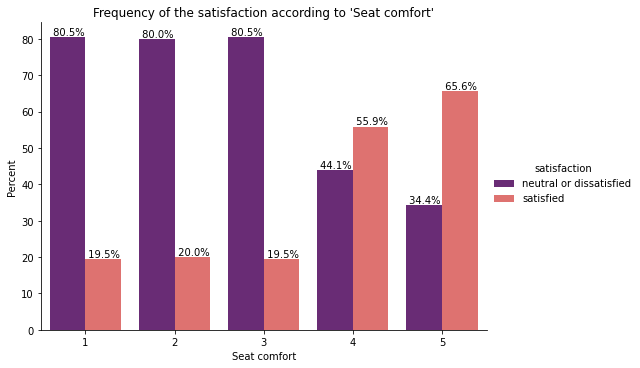

In [ ]:
# Dataframe of the frequencies
df_sc2 = (df.groupby(['Seat comfort'])['satisfaction']
            .value_counts(normalize=True)
            .rename('Percent')
            .mul(100)
            .reset_index()
            .sort_values('satisfaction'))
df_sc2

# One plots the barplot (without the frequencies)
g = sns.catplot(x="Seat comfort", y="Percent", kind="bar",
                hue="satisfaction",
                data=df_sc2, palette="magma",
                aspect=11.7/8.27)

# One adds the frequencies at the top of each bar
for p in g.ax.patches:
    txt = " " + str(p.get_height().round(1)) + '%'
    txt_x = p.get_x()
    txt_y = p.get_height() + 0.5
    g.ax.set_title("Frequency of the satisfaction according to 'Seat comfort'")
    g.ax.text(txt_x, txt_y, txt)


Among the customers who answered 1, 2, or 3, more than 80% are neutral or dissatisfied customers. Those who answered 4 or 5 are mostly satisfied customers. 

## 1.15. Inflight entertainment (quantitative variable)

The inflight entertainment corresponds to the satisfaction of it, it goes from 1 (worst) to 5 (best). 

**Summary statistics**

In [ ]:
# Summary statistics
df['Inflight entertainment'].describe()


count    119204.000000
mean          3.380507
std           1.327262
min           1.000000
25%           2.000000
50%           4.000000
75%           4.000000
max           5.000000
Name: Inflight entertainment, dtype: float64

In [ ]:
# Summary statistics on statisfied customers
df[df['satisfaction'] == 'satisfied']['Inflight entertainment'].describe()


count    50874.000000
mean         4.054350
std          1.000606
min          1.000000
25%          4.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: Inflight entertainment, dtype: float64

In [ ]:
# Summary statistics on unstatisfied customers
df[df['satisfaction'] != 'satisfied']['Inflight entertainment'].describe()


count    68330.000000
mean         2.878809
std          1.318341
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: Inflight entertainment, dtype: float64

Like before, satisfied customers have a higher average than the overall mean and the dissatisfied or neural ones a smaller average. 

**Distribution**

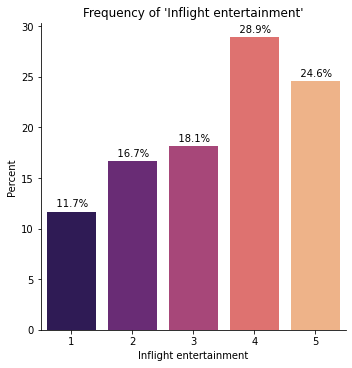

In [ ]:
# One draws the barplot of the variable "Inflight entertainment"
freq_ie = df["Inflight entertainment"].astype(str).value_counts(
    normalize=True)*100
l = []

# Creation of a dictionnary with the modalities and the
# frequency linked to the modalities
for i in range(freq_ie.shape[0]):
    l.append({"Inflight entertainment": freq_ie.index[i],
              "Percent": freq_ie[i]})

# One transforms this dictionnary into a dataframe
df_ie = pd.DataFrame(l)
df_ie

# One plots the barplot (without the frequencies)
g = sns.catplot(x="Inflight entertainment", y="Percent", kind="bar",
                data=df_ie, palette="magma",
                order=['1', '2', '3', '4', '5'])

# One adds the frequencies at the top of each bar
for p in g.ax.patches:
    txt = "   " + str(p.get_height().round(1)) + '%'
    txt_x = p.get_x()
    txt_y = p.get_height() + 0.5
    g.ax.set_title("Frequency of 'Inflight entertainment'")
    g.ax.text(txt_x, txt_y, txt)


People seem rather happy about the inflight entertainment since around 50% of the customers gave a 4 or 5 and almost 20% gave a 3. The grade given the most is 4. 

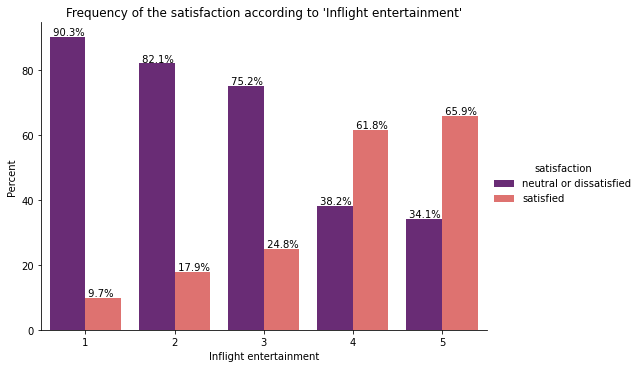

In [ ]:
# Dataframe of the frequencies
df_inflightentertainment = (
    df.groupby(['Inflight entertainment'])['satisfaction']
      .value_counts(normalize=True)
      .rename('Percent')
      .mul(100)
      .reset_index()
      .sort_values('satisfaction'))
df_inflightentertainment

# One plots the barplot (without the frequencies)
g = sns.catplot(x="Inflight entertainment", y="Percent", kind="bar",
                hue="satisfaction",
                data=df_inflightentertainment, palette="magma",
                aspect=11.7/8.27)

# One adds the frequencies at the top of each bar
for p in g.ax.patches:
    txt = " " + str(p.get_height().round(1)) + '%'
    txt_x = p.get_x()
    txt_y = p.get_height() + 0.5
    g.ax.set_title("Frequency of the satisfaction according "
                   "to 'Inflight entertainment'")
    g.ax.text(txt_x, txt_y, txt)


The conclusion is the same as for the previous variable. However, among the people who answered 1, 2 or 3 there are even more neutral or dissatisfied customers and among the customers who answered 4 or 5 there are more satisfied customers than before. 

## 1.16. On-board service (quantitative variable)

Going from 1 (worst) to 5 (best), it is the satisfaction of the on-board service. 

**Summary statistics**

In [ ]:
# Summary statistics
df['On-board service'].describe()


count    119204.000000
mean          3.386354
std           1.285393
min           1.000000
25%           2.000000
50%           4.000000
75%           4.000000
max           5.000000
Name: On-board service, dtype: float64

In [ ]:
# Summary statistics on statisfied customers
df[df['satisfaction'] == 'satisfied']['On-board service'].describe()


count    50874.000000
mean         3.905983
std          1.098310
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: On-board service, dtype: float64

In [ ]:
# Summary statistics on unstatisfied customers
df[df['satisfaction'] != 'satisfied']['On-board service'].describe()


count    68330.000000
mean         2.999473
std          1.278111
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: On-board service, dtype: float64

50% of the satisfied customers gave a 4 or less about the on-board service. 50% of the dissatisfied or neutral customers gave only 3 or less. 

**Distribution**

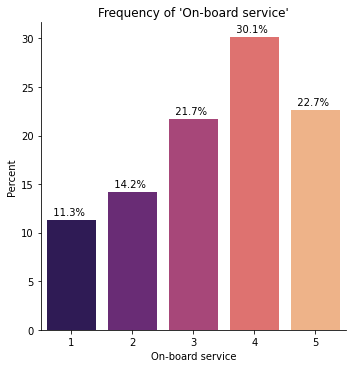

In [ ]:
# One draws the barplot of the variable "On-board service"
freq_obs = df["On-board service"].astype(str).value_counts(normalize=True)*100
l = []

# Creation of a dictionnary with the modalities and the
# frequency linked to the modalities
for i in range(freq_obs.shape[0]):
    l.append({"On-board service": freq_obs.index[i], "Percent": freq_obs[i]})

# One transforms this dictionnary into a dataframe
df_obs = pd.DataFrame(l)
df_obs

# One plots the barplot (without the frequencies)
g = sns.catplot(x="On-board service", y="Percent", kind="bar",
                data=df_obs, palette="magma",
                order=['1', '2', '3', '4', '5'])

# One adds the frequencies at the top of each bar
for p in g.ax.patches:
    txt = "  " + str(p.get_height().round(1)) + '%'
    txt_x = p.get_x()
    txt_y = p.get_height() + 0.5
    g.ax.set_title("Frequency of 'On-board service'")
    g.ax.text(txt_x, txt_y, txt)


Around 30% of the customers gave a 4 and 22.7% a 5. Only 25% (answer 1 and 2) of the customers seem not satisfied about the on-board service. 

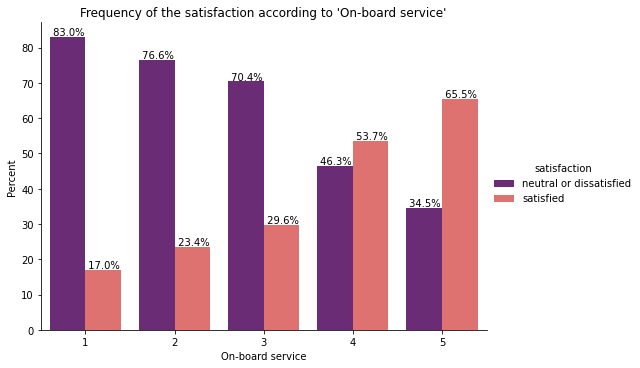

In [ ]:
# Dataframe of the frequencies
df_observice = (df.groupby(['On-board service'])['satisfaction']
                  .value_counts(normalize=True)
                  .rename('Percent')
                  .mul(100)
                  .reset_index()
                  .sort_values('satisfaction'))
df_observice

# One plots the barplot (without the frequencies)
g = sns.catplot(x="On-board service", y="Percent", kind="bar",
                hue="satisfaction",
                data=df_observice, palette="magma",
                aspect=11.7/8.27)

# One adds the frequencies at the top of each bar
for p in g.ax.patches:
    txt = " " + str(p.get_height().round(1)) + '%'
    txt_x = p.get_x()
    txt_y = p.get_height() + 0.5
    g.ax.set_title("Frequency of the satisfaction according "
                   "to 'On-board service'")
    g.ax.text(txt_x, txt_y, txt)


For the answers 1, 2, 3 and 5 the conclusion is the same as before. However, more neutral or dissatisfied than satisfied gave a 4: around 54% against 46%. 

## 1.17. Leg room service (quantitative variable)

The leg room service takes grades from 1 (worst) to 5 (best). 

**Summary statistics**

In [ ]:
# Summary statistics
df['Leg room service'].describe()


count    119204.000000
mean          3.380608
std           1.295451
min           1.000000
25%           2.000000
50%           4.000000
75%           4.000000
max           5.000000
Name: Leg room service, dtype: float64

In [ ]:
# Summary statistics on statisfied customers
df[df['satisfaction'] == 'satisfied']['Leg room service'].describe()


count    50874.000000
mean         3.897354
std          1.116932
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: Leg room service, dtype: float64

In [ ]:
# Summary statistics on unstatisfied customers
df[df['satisfaction'] != 'satisfied']['Leg room service'].describe()

count    68330.000000
mean         2.995873
std          1.285309
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: Leg room service, dtype: float64

The customers seem rather neutral about the leg room service since the overal mean, the mean of the satisfied ones, and the mean of the dissatisfied/neutral are all around 3 even though the mean of the satisfied ones is a little higher. 

**Distribution**

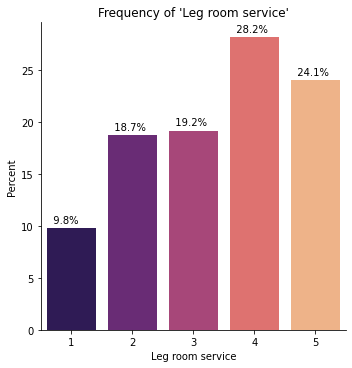

In [ ]:
# One draws the barplot of the variable "Leg room service"
freq_lgs = df["Leg room service"].astype(str).value_counts(normalize=True)*100
l = []

# Creation of a dictionnary with the modalities and the
# frequency linked to the modalities
for i in range(freq_lgs.shape[0]):
    l.append({"Leg room service": freq_lgs.index[i], "Percent": freq_lgs[i]})

# One transforms this dictionnary into a dataframe
df_lgs = pd.DataFrame(l)
df_lgs

# One plots the barplot (without the frequencies)
g = sns.catplot(x="Leg room service", y="Percent", kind="bar",
                data=df_lgs, palette="magma",
                order=['1', '2', '3', '4', '5'])

# One adds the frequencies at the top of each bar
for p in g.ax.patches:
    txt = "  " + str(p.get_height().round(1)) + '%'
    txt_x = p.get_x()
    txt_y = p.get_height() + 0.5
    g.ax.set_title("Frequency of 'Leg room service'")
    g.ax.text(txt_x, txt_y, txt)


More than 50% of the customers gave a 4 or 5 for the leg room service satisfaction. Only around 10% are not happy at all about it. 

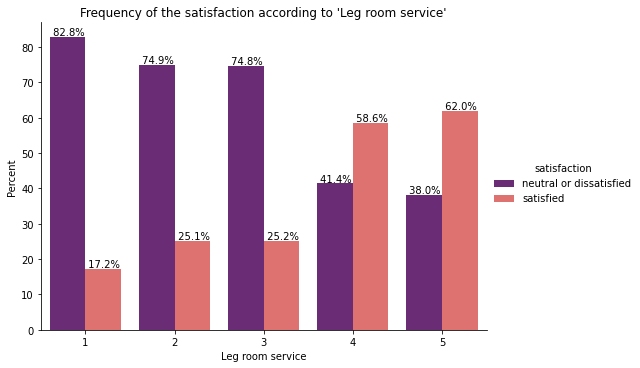

In [ ]:
# Dataframe of the frequencies
df_lrservicel = (df.groupby(['Leg room service'])['satisfaction']
                   .value_counts(normalize=True)
                   .rename('Percent')
                   .mul(100)
                   .reset_index()
                   .sort_values('satisfaction'))
df_lrservicel

# One plots the barplot (without the frequencies)
g = sns.catplot(x="Leg room service", y="Percent", kind="bar",
                hue="satisfaction",
                data=df_lrservicel, palette="magma",
                aspect=11.7/8.27)

# One adds the frequencies at the top of each bar
for p in g.ax.patches:
    txt = " " + str(p.get_height().round(1)) + '%'
    txt_x = p.get_x()
    txt_y = p.get_height() + 0.5
    g.ax.set_title("Frequency of the satisfaction according "
                   "to 'Leg room service'")
    g.ax.text(txt_x, txt_y, txt)


More than 58% of the people who answered 4 or 5 are satisfied customers. For these two answers the gap between the satisfied and neutral or dissatisfied isn't that big. It is much bigger for the answers 1, 2 and 3 for which more than 75% of the answers were given by neutral or dissatisfied customers. This variable might thus have an impact on the target variable. 

## 1.18. Baggage handling (quantitative variable)

The baggage handling is a satisfaction variable, the worst satisfaction is 1 and the best is 5. 

**Summary statistics**

In [ ]:
# Summary statistics
df['Baggage handling'].describe()


count    119204.000000
mean          3.637109
std           1.167923
min           1.000000
25%           3.000000
50%           4.000000
75%           5.000000
max           5.000000
Name: Baggage handling, dtype: float64

In [ ]:
# Summary statistics on statisfied customers
df[df['satisfaction'] == 'satisfied']['Baggage handling'].describe()


count    50874.000000
mean         4.007037
std          1.064243
min          1.000000
25%          4.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: Baggage handling, dtype: float64

In [ ]:
# Summary statistics on unstatisfied customers
df[df['satisfaction'] != 'satisfied']['Baggage handling'].describe()


count    68330.000000
mean         3.361686
std          1.165599
min          1.000000
25%          3.000000
50%          4.000000
75%          4.000000
max          5.000000
Name: Baggage handling, dtype: float64

The mean of the satisfied customers is almost at 4 which is higher than the overall mean. The mean of the not satisfied ones is smaller, around 3. However, the median for both groups is 4. 

**Distribution**

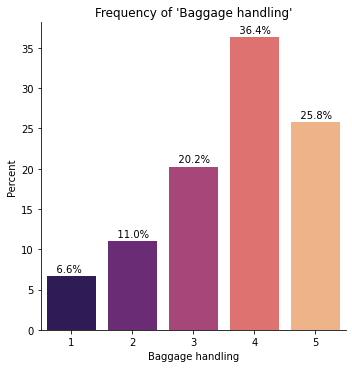

In [ ]:
# One draws the barplot of the variable "Baggage handling"
freq_bh = df["Baggage handling"].astype(str).value_counts(normalize=True)*100
l = []

# Creation of a dictionnary with the modalities and the
# frequency linked to the modalities
for i in range(freq_bh.shape[0]):
    l.append({"Baggage handling": freq_bh.index[i], "Percent": freq_bh[i]})

# One transforms this dictionnary into a dataframe
df_bh = pd.DataFrame(l)
df_bh

# One plots the barplot (without the frequencies)
g = sns.catplot(x="Baggage handling", y="Percent", kind="bar",
                data=df_bh, palette="magma",
                order=['1', '2', '3', '4', '5'])

# One adds the frequencies at the top of each bar
for p in g.ax.patches:
    txt = "   " + str(p.get_height().round(1)) + '%'
    txt_x = p.get_x()
    txt_y = p.get_height() + 0.5
    g.ax.set_title("Frequency of 'Baggage handling'")
    g.ax.text(txt_x, txt_y, txt)


The baggage handling is one of the variables for which the customers seem the most satisfied since 60% of them gave a 4 or 5 and 20% a 3. 

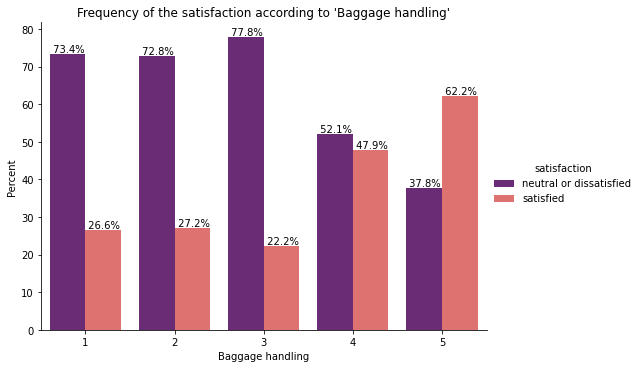

In [ ]:
# Dataframe of the frequencies
df_baggagehandling = (df.groupby(['Baggage handling'])['satisfaction']
                        .value_counts(normalize=True)
                        .rename('Percent')
                        .mul(100)
                        .reset_index()
                        .sort_values('satisfaction'))
df_baggagehandling

# One plots the barplot (without the frequencies)
g = sns.catplot(x="Baggage handling", y="Percent", kind="bar",
                hue="satisfaction",
                data=df_baggagehandling, palette="magma",
                aspect=11.7/8.27)

# One adds the frequencies at the top of each bar
for p in g.ax.patches:
    txt = " " + str(p.get_height().round(1)) + '%'
    txt_x = p.get_x()
    txt_y = p.get_height() + 0.5
    g.ax.set_title("Frequency of the satisfaction according "
                   "to 'Baggage handling'")
    g.ax.text(txt_x, txt_y, txt)


The gap betwwen the satisfied and neutral or dissatisfied customers is smaller than previously, a little more neutral/dissatisfied customers gave a 4 or 5 and a little more satisfied customers gave a 1, 2 or 3. This variable might have an impact of the satisfaction but it will probably be smaller than for other variables. 

## 1.19. Checkin service (quantitative variable)

Customers gave grades, 1 being the worst and 5 being the best about the checkin service. 

**Summary statistics**

In [ ]:
# Summary statistics
df['Checkin service'].describe()


count    119204.000000
mean          3.294688
std           1.266235
min           1.000000
25%           2.000000
50%           3.000000
75%           4.000000
max           5.000000
Name: Checkin service, dtype: float64

In [ ]:
# Summary statistics on statisfied customers
df[df['satisfaction'] == 'satisfied']['Checkin service'].describe()


count    50874.000000
mean         3.654283
std          1.154316
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: Checkin service, dtype: float64

In [ ]:
# Summary statistics on unstatisfied customers
df[df['satisfaction'] != 'satisfied']['Checkin service'].describe()


count    68330.000000
mean         3.026957
std          1.279497
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: Checkin service, dtype: float64

As before, the satisfied customers gave better grades since their mean and median is higher. 

**Distribution**

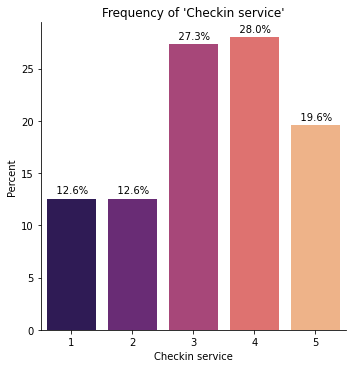

In [ ]:
# One draws the barplot of the variable "Checkin service"
freq_cs = df["Checkin service"].astype(str).value_counts(normalize=True)*100
l = []

# Creation of a dictionnary with the modalities and the
# frequency linked to the modalities
for i in range(freq_cs.shape[0]):
    l.append({"Checkin service": freq_cs.index[i], "Percent": freq_cs[i]})

# One transforms this dictionnary into a dataframe
df_cs = pd.DataFrame(l)
df_cs

# One plots the barplot (without the frequencies)
g = sns.catplot(x="Checkin service", y="Percent", kind="bar",
                data=df_cs, palette="magma",
                order=['1', '2', '3', '4', '5'])

# One adds the frequencies at the top of each bar
for p in g.ax.patches:
    txt = "   " + str(p.get_height().round(1)) + '%'
    txt_x = p.get_x()
    txt_y = p.get_height() + 0.5
    g.ax.set_title("Frequency of 'Checkin service'")
    g.ax.text(txt_x, txt_y, txt)


Many customers are rather neutral about the checkin service since almost 30% of them gave a 3. However, still quite a lot of customers gave a 4 or 5 (50%). One may notice than the answer 2 wasn't choosen so much, especially compared to the other variables. 

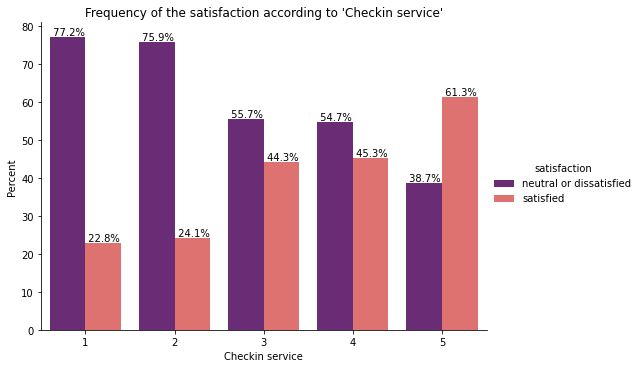

In [ ]:
# Dataframe of the frequencies
df_checkinservice = (df.groupby(['Checkin service'])['satisfaction']
                       .value_counts(normalize=True)
                       .rename('Percent')
                       .mul(100)
                       .reset_index()
                       .sort_values('satisfaction'))
df_checkinservice

# One plots the barplot (without the frequencies)
g = sns.catplot(x="Checkin service", y="Percent", kind="bar",
                hue="satisfaction",
                data=df_checkinservice, palette="magma",
                aspect=11.7/8.27)

# One adds the frequencies at the top of each bar
for p in g.ax.patches:
    txt = " " + str(p.get_height().round(1)) + '%'
    txt_x = p.get_x()
    txt_y = p.get_height() + 0.5
    g.ax.set_title("Frequency of the satisfaction according "
                   "to 'Checkin service'")
    g.ax.text(txt_x, txt_y, txt)


The frequencies are a little different than previously. Indeed, the only answer were more satisfied customers answered than neutral or dissatisfied is the answer 5. Moreover, one may notice that around 45% of the customers who answered 3 and 4 are satisfied customers. This variable can be interesting to keep. 

## 1.20. Inflight service (quantitative variable)

This variable is the satisfaction going from 1 (worst) to 5 (best) about the inflight service. 

**Summary statistics**

In [ ]:
# Summary statistics
df['Inflight service'].describe()


count    119204.000000
mean          3.646547
std           1.165733
min           1.000000
25%           3.000000
50%           4.000000
75%           5.000000
max           5.000000
Name: Inflight service, dtype: float64

In [ ]:
# Summary statistics on statisfied customers
df[df['satisfaction'] == 'satisfied']['Inflight service'].describe()


count    50874.000000
mean         4.009003
std          1.060769
min          1.000000
25%          4.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: Inflight service, dtype: float64

In [ ]:
# Summary statistics on unstatisfied customers
df[df['satisfaction'] != 'satisfied']['Inflight service'].describe()


count    68330.000000
mean         3.376687
std          1.167182
min          1.000000
25%          3.000000
50%          4.000000
75%          4.000000
max          5.000000
Name: Inflight service, dtype: float64

The overall mean is smaller than the mean of the satisfied customers but higher than the one of the dissatisfied/neutral ones. However, 50% of the customers of both groups gave a 4 or less. 

**Distribution**

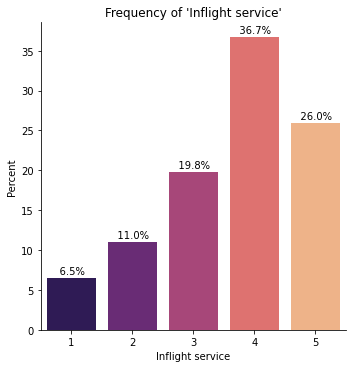

In [ ]:
# One draws the barplot of the variable "Inflight service"
freq_is = df["Inflight service"].astype(str).value_counts(normalize=True)*100
l = []

# Creation of a dictionnary with the modalities and the
# frequency linked to the modalities
for i in range(freq_is.shape[0]):
    l.append({"Inflight service": freq_is.index[i], "Percent": freq_is[i]})

# One transforms this dictionnary into a dataframe
df_is = pd.DataFrame(l)
df_is

# One plots the barplot (without the frequencies)
g = sns.catplot(x="Inflight service", y="Percent", kind="bar",
                data=df_is, palette="magma",
                order=['1', '2', '3', '4', '5'])

# One adds the frequencies at the top of each bar
for p in g.ax.patches:
    if len(str(p.get_height().round(1))) == 4:
        txt = "   " + str(p.get_height().round(1)) + '%'
        txt_x = p.get_x()
        txt_y = p.get_height() + 0.5
        g.ax.set_title("Frequency of 'Inflight service'")
        g.ax.text(txt_x, txt_y, txt)
    if len(str(p.get_height().round(1))) == 3:
        txt = "    " + str(p.get_height().round(1)) + '%'
        txt_x = p.get_x()
        txt_y = p.get_height() + 0.5
        g.ax.set_title("Frequency of 'Inflight service'")
        g.ax.text(txt_x, txt_y, txt)


Customers seem happy about the inflight service since less than 20% gave a 1 or 2. 

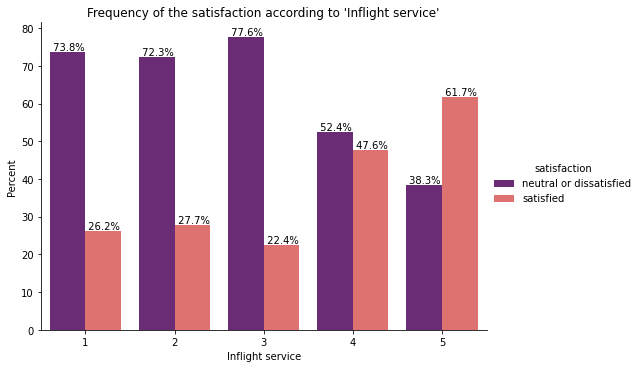

In [ ]:
# Dataframe of the frequencies
df_inflightservice = (df.groupby(['Inflight service'])['satisfaction']
                        .value_counts(normalize=True)
                        .rename('Percent')
                        .mul(100)
                        .reset_index()
                        .sort_values('satisfaction'))
df_inflightservice

# One plots the barplot (without the frequencies)
g = sns.catplot(x="Inflight service", y="Percent", kind="bar",
                hue="satisfaction",
                data=df_inflightservice, palette="magma",
                aspect=11.7/8.27)

# One adds the frequencies at the top of each bar
for p in g.ax.patches:
    txt = " " + str(p.get_height().round(1)) + '%'
    txt_x = p.get_x()
    txt_y = p.get_height() + 0.5
    g.ax.set_title("Frequency of the satisfaction according "
                   "to 'Inflight service'")
    g.ax.text(txt_x, txt_y, txt)


The satisfied customers are gain the ones giving the most 5. However, for all the other grades, more neutral or dissatisfied customers answered them. This variable might be interesting to keep. 

## 1.21. Cleanliness (quantitative variable)

This is the last variable that corresponds to a satisfaction grade going from 1 (worst) to 5 (best). 

**Summary statistics**

In [ ]:
# Summary statistics
df['Cleanliness'].describe()


count    119204.000000
mean          3.294034
std           1.310339
min           1.000000
25%           2.000000
50%           3.000000
75%           4.000000
max           5.000000
Name: Cleanliness, dtype: float64

In [ ]:
# Summary statistics on statisfied customers
df[df['satisfaction'] == 'satisfied']['Cleanliness'].describe()

count    50874.000000
mean         3.795200
std          1.111739
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: Cleanliness, dtype: float64

In [ ]:
# Summary statistics on unstatisfied customers
df[df['satisfaction'] != 'satisfied']['Cleanliness'].describe()


count    68330.000000
mean         2.920899
std          1.322465
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: Cleanliness, dtype: float64

50% of the unsatisfied customers gave a 3 or less whereas 50% of the satisfied customers gave a 4 or less. The satisfied ones are a little more satisfied about the cleanliness. 

**Distribution**

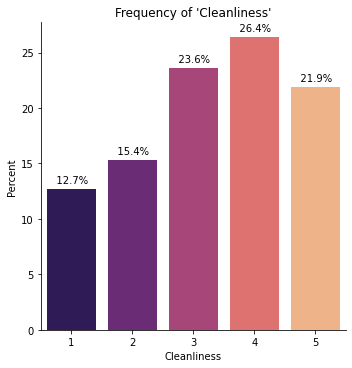

In [ ]:
# One draws the barplot of the variable "Cleanliness"
freq_clean = df["Cleanliness"].astype(str).value_counts(normalize=True)*100
l = []

# Creation of a dictionnary with the modalities and the
# frequency linked to the modalities
for i in range(freq_clean.shape[0]):
    l.append({"Cleanliness": freq_clean.index[i], "Percent": freq_clean[i]})

# One transforms this dictionnary into a dataframe
df_clean = pd.DataFrame(l)
df_clean

# One plots the barplot (without the frequencies)
g = sns.catplot(x="Cleanliness", y="Percent", kind="bar",
                data=df_clean, palette="magma",
                order=["1", "2", "3", "4", "5"])

# One adds the frequencies at the top of each bar
for p in g.ax.patches:
    txt = "   " + str(p.get_height().round(1)) + '%'
    txt_x = p.get_x()
    txt_y = p.get_height() + 0.5
    g.ax.set_title("Frequency of 'Cleanliness'")
    g.ax.text(txt_x, txt_y, txt)


The grade that is the most answered is 4 and then 3. The cleanliness doesn't seem to be the variable with the highest satisfaction but also not the worse. 

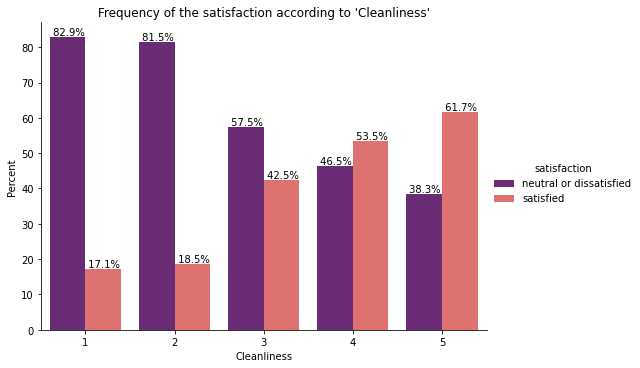

In [ ]:
# Dataframe of the frequencies
df_cleanliness = (df.groupby(['Cleanliness'])['satisfaction']
                    .value_counts(normalize=True)
                    .rename('Percent')
                    .mul(100)
                    .reset_index()
                    .sort_values('satisfaction'))
df_cleanliness

# One plots the barplot (without the frequencies)
g = sns.catplot(x="Cleanliness", y="Percent", kind="bar",
                hue="satisfaction",
                data=df_cleanliness, palette="magma",
                aspect=11.7/8.27)

# One adds the frequencies at the top of each bar
for p in g.ax.patches:
    txt = " " + str(p.get_height().round(1)) + '%'
    txt_x = p.get_x()
    txt_y = p.get_height() + 0.5
    g.ax.set_title("Frequency of the satisfaction according to 'Cleanliness'")
    g.ax.text(txt_x, txt_y, txt)


More than 50% of the customers who answered 4 or 5 are satisfied customers. Only very few satisfied customers answered 1 or 2 (less than 20%). 

## 1.22. Departure Delay in Minutes (quantitative variable)

This variable gives, in minutes, the departure delay. 

**Summary statistics**

In [ ]:
# Summary statistics 
df["Departure Delay in Minutes"].describe()


count    119204.000000
mean         14.837631
std          38.165770
min           0.000000
25%           0.000000
50%           0.000000
75%          13.000000
max        1592.000000
Name: Departure Delay in Minutes, dtype: float64

In [ ]:
# Summary statistics on satisfied customers
df[df['satisfaction'] == 'satisfied']['Departure Delay in Minutes'].describe()


count    50874.000000
mean        12.575127
std         35.175550
min          0.000000
25%          0.000000
50%          0.000000
75%          9.000000
max       1305.000000
Name: Departure Delay in Minutes, dtype: float64

In [ ]:
# Summary statistics on unsatisfied customers
df[df['satisfaction'] != 'satisfied']['Departure Delay in Minutes'].describe()


count    68330.000000
mean        16.522143
std         40.165643
min          0.000000
25%          0.000000
50%          0.000000
75%         15.000000
max       1592.000000
Name: Departure Delay in Minutes, dtype: float64

The overall average departure delay is around 15 minutes. It is a little lower for the satisfied customers, 12.5 minutes, which might explain why they are satisfied. Moreover, it is higher for the unsatisfied customers. 

**Distribution**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


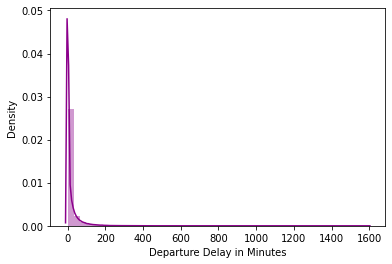

In [ ]:
# Density plot
sns.distplot(df["Departure Delay in Minutes"], kde=True, color="darkmagenta")
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


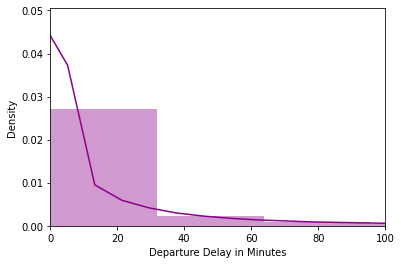

In [ ]:
# Density plot (focus departures delays that go from 0 to 100 minutes)
sns.distplot(df["Departure Delay in Minutes"], kde=True, color="darkmagenta")
plt.xlim(0, 100)
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


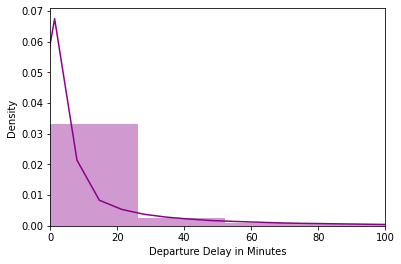

In [ ]:
# Density plot on satisfied customers (focus departures delays that go
# from 0 to 100 minutes)
sns.distplot(df[df['satisfaction'] == 'satisfied'][
                'Departure Delay in Minutes'], kde=True, color="darkmagenta")
plt.xlim(0, 100)
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


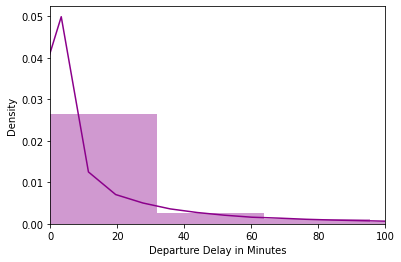

In [ ]:
# Density plot on unsatisfied customers (focus departures delays that go
# from 0 to 100 minutes)
sns.distplot(df[df['satisfaction'] != 'satisfied'][
              'Departure Delay in Minutes'], kde=True, color="darkmagenta")
plt.xlim(0, 100)
plt.show()


When looking at the departure delay, one may notice that the delay seems a little higher for unsatisfied customers. It confirms that this variable could be interesting. 

## 1.23. Arrival Delay in Minutes (quantitative variable)

As for the departure delay, this varibale give the arrival delay in minutes. 

**Summary statistics**

In [ ]:
# Summary statistics
df["Arrival Delay in Minutes"].describe()


count    119204.000000
mean         15.284361
std          38.687386
min           0.000000
25%           0.000000
50%           0.000000
75%          13.000000
max        1584.000000
Name: Arrival Delay in Minutes, dtype: float64

In [ ]:
# Summary statistics on satisfied customers
df[df['satisfaction'] == 'satisfied']['Arrival Delay in Minutes'].describe()


count    50874.000000
mean        12.669635
std         35.770449
min          0.000000
25%          0.000000
50%          0.000000
75%          9.000000
max       1280.000000
Name: Arrival Delay in Minutes, dtype: float64

In [ ]:
# Summary statistics on unsatisfied customers
df[df['satisfaction'] != 'satisfied']['Arrival Delay in Minutes'].describe()


count    68330.000000
mean        17.231114
std         40.614766
min          0.000000
25%          0.000000
50%          0.000000
75%         17.000000
max       1584.000000
Name: Arrival Delay in Minutes, dtype: float64

The deduction is the same as for the departure delay. It is smaller in average for the satisfied customers than the dissatisfied/neutral ones. 

**Distribution**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


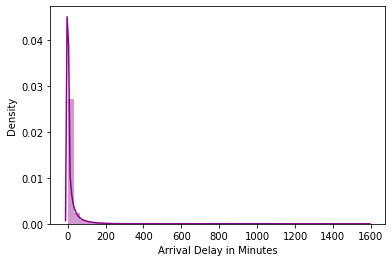

In [ ]:
# Density plot
sns.distplot(df["Arrival Delay in Minutes"], kde=True, color="darkmagenta")
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


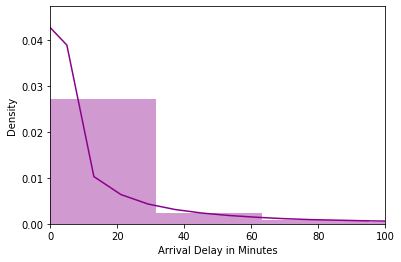

In [ ]:
# Density plot (focus arrival delays that go from 0 to 100 minutes)
sns.distplot(df["Arrival Delay in Minutes"], kde=True, color="darkmagenta")
plt.xlim(0, 100)
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


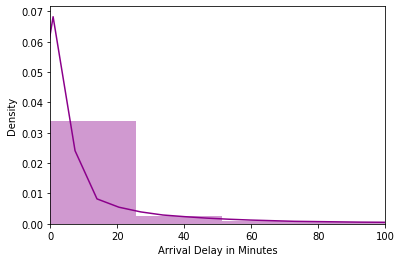

In [ ]:
# Density plot on satisfied customers (focus arrival delays
# that go from 0 to 100 minutes)
sns.distplot(df[df['satisfaction'] == 'satisfied']['Arrival Delay in Minutes'],
             kde=True, color="darkmagenta")
plt.xlim(0, 100)
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


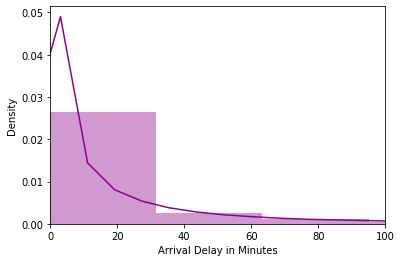

In [ ]:
# Density plot on unsatisfied customers (focus arrival delays
# that go from 0 to 100 minutes)
sns.distplot(df[df['satisfaction'] != 'satisfied']['Arrival Delay in Minutes'],
             kde=True, color="darkmagenta")
plt.xlim(0, 100)
plt.show()


The conclusion is the same than for the departure delay in minutes. These two variables might thus be highly correlated. 

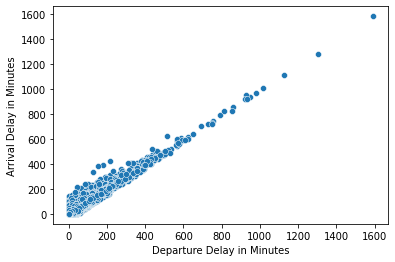

In [ ]:
# Scatterplot of the arrival and departure delay
sns.scatterplot(data=df, x="Departure Delay in Minutes", 
                y="Arrival Delay in Minutes")


It seems very coherent that arrival delays and departure delays are positively and linearly correlated. One of them might be deleted. 

# Summary

All the 22 variables could be linked to the satisfaction and impact. The correlation between the variables and the target will be studied in the spark part. 

The changes that have to be done for the classification are the following: 

- **Gender**: a dummy variable is created, 1 if the passenger is a female and 0 otherwise. 
- **Customer Type**: a dummy variable is created, 1 if the customer is loyal and 0 otherwise. 
- **Type of Travel**: a dummy variable is created: 1 if the travel is for business and 0 for personal. 
- **Class**: one dummy equal to 1 if the passenger is in business class and 0 otherwise and one dummy equal to 1 if the passenger is in eco class and 0 otherwise.